# Priyank Sai Pannem - XR97612

# Logistic Regression Assignment

- Run the below cells. If you have the data in a different directory, you'll need to change the url.
- Complete all of the numbered questions. You may call any packages that we've used in class.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('employee-turnover-balanced.csv')
df.head()

,left_company,age,frequency_of_travel,department,commuting_distance,education,satisfaction_with_environment,gender,seniority_level,position,satisfaction_with_job,married_or_single,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
0,No,37,Travel_Rarely,Sales,16,4,4,Male,2,Sales Executive,3,Divorced,19,3,9,1,0,0,0
1,No,39,Travel_Rarely,Research & Development,3,2,3,Male,2,Laboratory Technician,3,Divorced,15,3,11,10,8,0,7
2,No,52,Travel_Frequently,Research & Development,25,4,3,Female,4,Manufacturing Director,4,Married,22,4,31,9,8,0,0
3,No,50,Non-Travel,Sales,1,3,4,Female,2,Sales Executive,3,Married,12,3,19,18,7,0,13
4,No,44,Travel_Rarely,Research & Development,4,3,4,Male,2,Healthcare Representative,2,Single,12,3,10,5,2,2,3


## Data Definitions
- `left_company`: Whether individual left the company or not. This is the target variable.  
- `age`: Age of individual. 
- `frequency_of_travel`: How often person travels for work.  
- `department`: Department person works(worked).  
- `commuting_distance`: Distance person lives from office.  
- `education`: Highest education category.  
- `satisfaction_with_environment`: Satisfaction of environment, on lickert scale.  
- `gender`: Gender of individual.  
- `seniority_level`: Seniority level of individual.  
- `position`: Last position held at the company.  
- `satisfaction_with_job`: Satisfaction of their job, on lickert scale.  
- `married_or_single`: Marital status of person.  
- `last_raise_pct`: Percent increase their last raise represented.  
- `last_performance_rating`: Most recent annual performance rating, on lickert scale.  
- `total_years_working`: Number of years the individual has spent working in their career.  
- `years_at_company`: Number of years the individual has been at the company, regardless of position.  
- `years_in_current_job`: Number of years the individual has been in their current position.  
- `years_since_last_promotion`: Years since the person had their last promotion.  
- `years_with_current_supervisor`: Years the person has had their current supervisor.

# Question 1
- What is the distribution of the target (`left_company`)?  
- Do you have any concerns on class imbalances?

<AxesSubplot:>

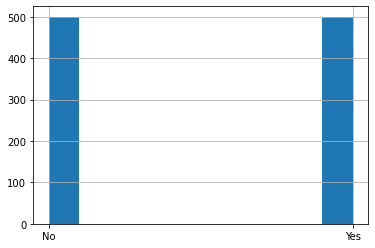

In [2]:
# insert code
df['left_company'].hist()

In [3]:
df['left_company'].value_counts()

No     500
Yes    500
Name: left_company, dtype: int64

### Insights from above plot
- We can say that data set has equal contribution to the both the classes (Yes/No)
- The peple who left the company == people are still in the company == 500

# Question 2
- Create and print a list of the variables that you would treat as numerical and another list for the variables that you would treat as categorical.  
- Explain your choices.

In [4]:
numerical_vars = ['age','commuting_distance','last_raise_pct','total_years_working','years_at_company','years_in_current_job','years_since_last_promotion','years_with_current_supervisor']
categorical_vars = ['frequency_of_travel', 'department','education','satisfaction_with_environment','gender','seniority_level','position','satisfaction_with_job','married_or_single','last_performance_rating']

In [5]:
df.head()

,left_company,age,frequency_of_travel,department,commuting_distance,education,satisfaction_with_environment,gender,seniority_level,position,satisfaction_with_job,married_or_single,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
0,No,37,Travel_Rarely,Sales,16,4,4,Male,2,Sales Executive,3,Divorced,19,3,9,1,0,0,0
1,No,39,Travel_Rarely,Research & Development,3,2,3,Male,2,Laboratory Technician,3,Divorced,15,3,11,10,8,0,7
2,No,52,Travel_Frequently,Research & Development,25,4,3,Female,4,Manufacturing Director,4,Married,22,4,31,9,8,0,0
3,No,50,Non-Travel,Sales,1,3,4,Female,2,Sales Executive,3,Married,12,3,19,18,7,0,13
4,No,44,Travel_Rarely,Research & Development,4,3,4,Male,2,Healthcare Representative,2,Single,12,3,10,5,2,2,3


I classified the features into numerical and categorical for the following reasons

### Numerical Features

- Age, Commuting Distance, last_raise_pct, total_years_working, years_at_company, years_in_current_job, years_since_last_promotion, years_with_current_supervisor are continuous varibles and takes multiple numerical values

### Categorical Features

- <b>frequency_of_travel</b> has 3 types of categories namely 'Travel_Rarely', 'Travel_Frequently' and 'Non-Travel', this makes it to be classfied as categorical feature
- <b>department</b> has 3 types of categories namely 'Sales', 'Research & Development' and 'Human Resources', this makes it to be classfied as categorical feature
- <b>education</b> has 5 levels of categories namely [4, 2, 3, 1, 5], this makes it to be classfied as categorical feature
- <b>satisfaction_with_environment</b>  has 4 levels of categories namely [4, 3, 1, 2], this makes it to be classfied as categorical feature
- <b>gender</b> has 2 types of categories namely 'Male' and 'Female', this makes it to be classfied as categorical feature
- <b>seniority_level</b> has 5 levels of categories namely [4, 2, 3, 1, 5], this makes it to be classfied as categorical feature
- <b>position</b> has 9 types of categories namely 'Sales Executive', 'Laboratory Technician','Manufacturing Director', 'Healthcare Representative', 'Manager','Research Scientist', 'Research Director', 'Sales Representative' and 'Human Resources', this makes it to be classfied as categorical feature
- <b>satisfaction_with_job</b> has 4 levels of categories namely [4, 3, 1, 2], this makes it to be classfied as categorical feature
- <b>married_or_single</b> has 3 types of categories namely 'Divorced', 'Married', 'Single', this makes it to be classfied as categorical feature
- <b>last_performance_rating</b> has 3 levels of categories namely [4, 3], this makes it to be classfied as categorical feature

# Question 3
- Determine if any numerical variables risk multicolinearity.  
- Remove those variables (if any) from your numerical_vars list.  
- Why did you or did not remove any?

In [6]:
corr_df = df[numerical_vars].corr()
corr_df

,age,commuting_distance,last_raise_pct,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
age,1.000000,0.012074,0.027851,0.673804,0.384760,0.310010,0.242456,0.273679
commuting_distance,0.012074,1.000000,0.104421,0.025593,0.023017,0.031890,0.047552,0.031520
last_raise_pct,0.027851,0.104421,1.000000,-0.004905,0.004435,0.039691,0.000615,0.060882
total_years_working,0.673804,0.025593,-0.004905,1.000000,0.685955,0.548494,0.423619,0.506007
years_at_company,0.384760,0.023017,0.004435,0.685955,1.000000,0.801423,0.630344,0.781147
years_in_current_job,0.310010,0.031890,0.039691,0.548494,0.801423,1.000000,0.611928,0.781647
years_since_last_promotion,0.242456,0.047552,0.000615,0.423619,0.630344,0.611928,1.000000,0.599529
years_with_current_supervisor,0.273679,0.031520,0.060882,0.506007,0.781147,0.781647,0.599529,1.000000


In [7]:
# created new numerical features list after droping 'years_at_company' and 'years_in_current_job' features
new_numerical_vars = ['age','commuting_distance','last_raise_pct','total_years_working','years_since_last_promotion','years_with_current_supervisor']

### Insights from above Colinear matrix
- 'years_at_company' and 'years_in_current_job' are two numerical features whose colinearity with each other and few other features is close to 0.80
- If the correlation > 0.8 there are chances of high multicollinearity, so droping 'years_at_company' and 'years_in_current_job' features will reduce the risk factor.

# Question 4
- Split the data into training and test sets.  
- Use 20% of the data for test and a random state of 124.  

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop(['years_at_company','left_company','years_in_current_job'],axis='columns')
y = df['left_company']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=124)

# Question 5
- Create a pipeline to process the numerical data.  
- Create a pipeline to process the categorical data.  

Verify each pipeline contains the columns you would expect using a fit_transform on the training data, i.e., print the shapes of the fit_transforms for each pipeline.

In [9]:
from sklearn import set_config
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

### Numerical Pipeline

In [10]:
numerical_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('standardize_num', StandardScaler())
                        ])
set_config(display='diagram')
numerical_pipeline

Pipeline(steps=[('impute_missing', SimpleImputer(strategy='median')),
                ('standardize_num', StandardScaler())])

In [11]:
transformed_numerical_rows_columns = numerical_pipeline.fit_transform(X_train[new_numerical_vars]).shape
actual_numerical_rows_columns = X_train[new_numerical_vars].shape
print("Actual numerical rows and columns:",actual_numerical_rows_columns)
print("Transformed numerical rows and columns:",transformed_numerical_rows_columns)

Actual numerical rows and columns: (800, 6)
Transformed numerical rows and columns: (800, 6)


In [12]:
actual_numerical_rows_columns == transformed_numerical_rows_columns

True

### Categorical Pipeline

In [13]:
categorical_pipeline = Pipeline([('impute_missing_cats', SimpleImputer(strategy='most_frequent')),
                          ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))])
set_config(display='diagram')
categorical_pipeline

Pipeline(steps=[('impute_missing_cats',
                 SimpleImputer(strategy='most_frequent')),
                ('create_dummies_cats',
                 OneHotEncoder(drop='first', handle_unknown='ignore'))])

In [14]:
transformed_categorical_columns = categorical_pipeline.fit_transform(X_train[categorical_vars]).shape[1]

# the columns that are created after passing into OneHotEncoder
actual_categorical_columns = categorical_pipeline.named_steps['create_dummies_cats'].get_feature_names_out().shape[0]

print("Actual categorical columns:",actual_categorical_columns)
print("Transformed categorical columns:",transformed_categorical_columns)

Actual categorical columns: 30
Transformed categorical columns: 30


In [15]:
transformed_categorical_columns == actual_categorical_columns

True

# Question 6
- Create a pipeline that combines the pre-processing and implements a logistic regression model.  
- Print the accuracy on the training set and the test set.
- Do you have any concerns of overfitting based on the differences between the two accuracy scores?

In [16]:
from sklearn.compose import ColumnTransformer
processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', numerical_pipeline, new_numerical_vars),
                                                      ('create_dummies', categorical_pipeline, categorical_vars)])

processing_pipeline

ColumnTransformer(transformers=[('proc_numeric',
                                 Pipeline(steps=[('impute_missing',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize_num',
                                                  StandardScaler())]),
                                 ['age', 'commuting_distance', 'last_raise_pct',
                                  'total_years_working',
                                  'years_since_last_promotion',
                                  'years_with_current_supervisor']),
                                ('create_dummies',
                                 Pipeline(steps=[('impute_missing_cats',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('create_dummies_cats',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['frequency_of_travel', 'department',
                                  'education', 'satisfaction_with_environment',
                                  'gender', 'seniority_level', 'position',
                                  'satisfaction_with_job', 'married_or_single',
                                  'last_performance_rating'])])

In [17]:
from sklearn.linear_model import LogisticRegression

modeling_pipeline = Pipeline([('data_processing', processing_pipeline), 
                              ('lm', LogisticRegression())
                             ])
modeling_pipeline.fit(X_train, y_train)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['age', 'commuting_distance',
                                                   'last_raise_pct',
                                                   'total_years_working',
                                                   'years_since_last_promotion',
                                                   'years_with_current_supervisor']),
                                                 ('create_dummies',
                                                  Pipeline(ste...ng_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['frequency_of_travel',
                                                   'department', 'education',
                                                   'satisfaction_with_environment',
                                                   'gender', 'seniority_level',
                                                   'position',
                                                   'satisfaction_with_job',
                                                   'married_or_single',
                                                   'last_performance_rating'])])),
                ('lm', LogisticRegression())])

In [18]:
from sklearn.metrics import classification_report
predictions_train = modeling_pipeline.predict(X_train)
training_score = classification_report(y_train, predictions_train)
print('Scores on Training Data\n')
print(training_score)

Scores on Training Data

              precision    recall  f1-score   support

          No       0.77      0.75      0.76       407
         Yes       0.75      0.77      0.76       393

    accuracy                           0.76       800
   macro avg       0.76      0.76      0.76       800
weighted avg       0.76      0.76      0.76       800



In [19]:
print('Scores on Testing Data\n')
predictions_test = modeling_pipeline.predict(X_test)
testing_score = classification_report(y_test, predictions_test)
print(testing_score)

Scores on Testing Data

              precision    recall  f1-score   support

          No       0.68      0.63      0.66        93
         Yes       0.70      0.74      0.72       107

    accuracy                           0.69       200
   macro avg       0.69      0.69      0.69       200
weighted avg       0.69      0.69      0.69       200



### Insights from the above values
- As the training accuracy is greater than testing accuracy it is the sign for overfitting
- This means the model has actually memorized the values insted of learning from the data

# Question 7
What would you recommend as potential next steps for continuing to develop and evaluate a model?

In overfitting, the model performs well on the training data but badly on the testing data

To overcome overfitting follow below steps

- <b>Larger data exposer</b>: By giving the model access to a larger and more varied dataset, greater data collection can help to solve this problem.
- <b>Regularization</b>: This technique helps model to focus on important features
- <b>Tuning hyperparameters</b>: Tuning the paramters of the model will help in finding new patterns in the data
- <b>Ensemble methods</b>: Several models are combined using ensemble methods to boost prediction accuracy.